#Instructions to run the code: 

1.   Import packages upload the datasets
2.   Perform data preprocessing and exploration
3.   Select one of the three models that I have explored, and run all the cells related to that model
4.   Predict on the test dataset by running all the cells in the testing section
5.   Repeat step 3-4 to explore the models one by one



# Importing packages and Uploading datasets

In [ ]:
# Importing packages

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import image
import seaborn as sns

from sklearn.metrics import confusion_matrix, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, AveragePooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam, SGD

from keras import layers, Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.losses import binary_crossentropy
from keras.models import Model

In [ ]:
# Reading the train and test datasets provided
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Data Preprocessing and Exploration

*   Checking for null values in both the train and test datasets
*   Checking the shape of the train and test datasets
*   Displaying the number of 0 labels and 1 labels in the dataset to identify level of imbalance
*   Assigning a variable X to the train dataset (dropping the 'label' column)
*   Reshaping X to be of 3 dimensions (-1, 20, 20, 1)
*   Displaying the first 10 images with labels to examine a visualization of the image input data

In [ ]:
# Checking if there are any null values in the training dataset
train_df.isnull().any()

r0c0      False
r0c1      False
r0c2      False
r0c3      False
r0c4      False
          ...  
r19c16    False
r19c17    False
r19c18    False
r19c19    False
label     False
Length: 401, dtype: bool

In [ ]:
# Checking if there are any null values in the test dataset
test_df.isnull().any()

Id        False
r0c0      False
r0c1      False
r0c2      False
r0c3      False
          ...  
r19c15    False
r19c16    False
r19c17    False
r19c18    False
r19c19    False
Length: 401, dtype: bool

In [ ]:
# Checking the shape of the train dataset
train_df.shape

(72139, 401)

In [ ]:
# Checking the shape of the test dataset
test_df.shape

(30917, 401)

In [ ]:
# Dropping labels and assigning these features and values to X
X = train_df.drop(columns=['label'], axis=1).values
X = X.astype(np.float32)

# Reshaping X
X = X.reshape((-1, 20, 20, 1))

# Assigning y to the labels, and convert y to an array
y = train_df['label'].tolist()
y = np.array(y)

print(X.shape, y.shape)

(72139, 20, 20, 1) (72139,)


In [ ]:
# Counting the number of 0s and 1s in the dataset
zeros = 0
ones = 0

for value in y:
    if value == 0:
      zeros += 1
    else:
      ones +=1

print(zeros, ones)
#Counted 65581 zeros, and 6558 ones

65581 6558


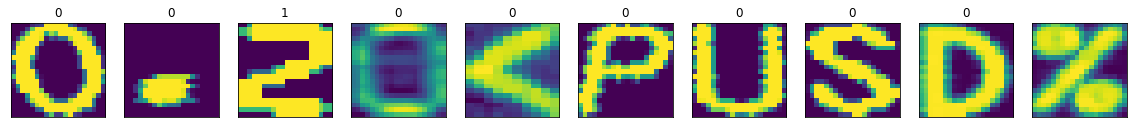

In [ ]:
# Displaying examples of the images to examine them
n = 10 # Printing the first 10
plt.figure(figsize=(20, 4))

for index in range(n):
  plt.title(str(y[index])) # Title is the label of the image
  ax = plt.subplot(2, n, index + 1 + n)
  plt.imshow(X[index].reshape((20, 20)))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

#First Model - Convolutional Neural Network (CNN)
A model I created which was inspired by VGG19

This section contains:
*   Image data preprocessing
*   Data splitting
*   Model Training
*   Loss plotting

To run:

1.   Split the data and train the model
2.   Assess the validation loss using the loss plotting
3.   Predict on the test set in the predictions section

Data splitting (for first CNN model):

This is the data split I used for my first model. I used different datasplits for my other models.
*   Using a 80/20 split
*   Printing out the dataset shapes after splitting to see their dimensions



In [ ]:
# Splitting the data into train and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 2021)

# Printing out the shapes of the datasets to ensure they are of compatible dimensions
print("Train images shape: ", X_train.shape)
print("Validation images shape: ", X_val.shape)
print("Train labels shape: ", y_train.shape)
print("Validation labels shape: ", y_val.shape)

ntrain = len(X_train)
nval = len(X_val)

Train images shape:  (57711, 20, 20, 1)
Validation images shape:  (14428, 20, 20, 1)
Train labels shape:  (57711,)
Validation labels shape:  (14428,)


Image data preprocessing:

This is the image data preprocessing I performed for my first CNN model. I performed different image data preprocessing for my other models.
*   Using ImageDataGenerator with image augmentation to test if it would reduce overfitting
*   Setting batch_size and train input for the model

To run: Run the cell calling the ImageDataGenerator function with image augmentation. Then create train_datagen and val_datagen (next cell).





In [ ]:
# With image augmentation
train_image_datagen = ImageDataGenerator(rescale = 1./255,
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)

# Only need to rescale validation set, no need to augment
val_image_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Setting train and val datagen with a specified batch_size
train_datagen = train_image_datagen.flow(
    x=X_train,
    y=y_train,
    batch_size=32,
)

val_datagen = val_image_datagen.flow(
    x=X_val,
    y=y_val,
    batch_size=32,
)

Model architecture:

This is the code to build the model
*   Added batch normalization and dropout layers
*   Model trained using 25 epochs, without callback


To run: Run all cells in this section in order and wait for the model to be trained. Must run all cells in the data splitting and image data preprocessing first before being able to train the model.


In [ ]:
# Initial model utilizing my own implementation of VGG19

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(20,20,1)))
model.add(MaxPooling2D(pool_size=2, padding='same', strides=2))
model.add(layers.BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same', strides=2))
model.add(layers.BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same', strides=2))
model.add(Dropout(rate=0.2))
model.add(layers.BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same', strides=2))
model.add(Dropout(rate=0.2))
model.add(layers.BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same', strides=2))
model.add(Dropout(rate=0.2))
model.add(layers.BatchNormalization())

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 20, 20, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 10, 10, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                      

In [ ]:
# Compiling the model using the Adam optimizer with a learning rate of 3e-4
model.compile(loss='binary_crossentropy', 
              optimizer = Adam(lr=3e-4), 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Training the model using 25 epochs, where number of steps is the length of the train and validation steps divided by the batch size (32)
history = model.fit_generator(
    train_datagen,
    steps_per_epoch = ntrain // 32,
    epochs = 25,
    validation_data = val_datagen,
    validation_steps = nval // 32
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/25
1803/1803 [==============================] - 52s 28ms/step - loss: 0.3008 - acc: 0.8962 - val_loss: 0.1596 - val_acc: 0.9410
Epoch 2/25
1803/1803 [==============================] - 52s 29ms/step - loss: 0.2049 - acc: 0.9312 - val_loss: 0.1700 - val_acc: 0.9448
Epoch 3/25
1803/1803 [==============================] - 50s 28ms/step - loss: 0.1768 - acc: 0.9404 - val_loss: 0.1535 - val_acc: 0.9463
Epoch 4/25
1803/1803 [==============================] - 50s 28ms/step - loss: 0.1599 - acc: 0.9456 - val_loss: 0.1157 - val_acc: 0.9589
Epoch 5/25
1803/1803 [==============================] - 50s 28ms/step - loss: 0.1460 - acc: 0.9499 - val_loss: 0.1705 - val_acc: 0.9374
Epoch 6/25
1803/1803 [==============================] - 49s 27ms/step - loss: 0.1376 - acc: 0.9522 - val_loss: 0.1028 - val_acc: 0.9636
Epoch 7/25
1803/1803 [==============================] - 50s 28ms/step - loss: 0.1288 - acc: 0.9555 - val_loss: 0.1010 - val_acc: 0.9637
Epoch 8/25
1803/1803 [==========================

Plotting the loss curves after training

*   Training loss
*   Validation loss

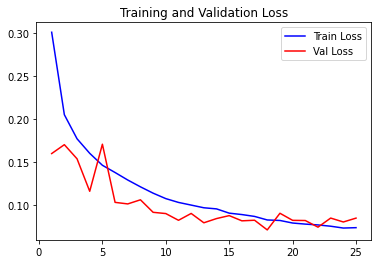

In [ ]:
# Plot the losses
loss = history.history['loss'] # Training loss
val_loss = history.history['val_loss'] # Validation loss

epochs = range(1, len(loss) + 1)

# Plotting with labels, title, and legend
plt.figure()
plt.plot(epochs, loss, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Val Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

#Second Model - Convolutional Neural Network (CNN)
A new model with only 2 layers. This model was used for one of my final Kaggle submissions

This section contains:
*   Image data preprocessing
*   Data splitting
*   Model Training
*   Loss plotting

To run:

1.   Split the data and train the model
2.   Assess the validation loss using the loss plotting
3.   Predict on the test set in the predictions section

Data splitting:

This is the data split I used for my second model. I used different datasplits for my other models.
*   Using a 90/10 split
*   Printing out the dataset shapes after splitting to see their dimensions

In [ ]:
# Splitting the data into train and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state = 2021)

# Printing out the shapes of the datasets to ensure they are of compatible dimensions
print("Train images shape: ", X_train.shape)
print("Validation images shape: ", X_val.shape)
print("Train labels shape: ", y_train.shape)
print("Validation labels shape: ", y_val.shape)

ntrain = len(X_train)
nval = len(X_val)

Train images shape:  (64925, 20, 20, 1)
Validation images shape:  (7214, 20, 20, 1)
Train labels shape:  (64925,)
Validation labels shape:  (7214,)


Image data preprocessing:

This is the image data preprocessing I performed for my second CNN model. I performed different image data preprocessing for my other models.
*   Using ImageDataGenerator without image augmentation
*   Setting batch_size and train input for the model

To run: Run the cell calling the ImageDataGenerator function without image augmentation. Then create train_datagen and val_datagen (next cell).

In [ ]:
# Without image augmentation
train_image_datagen = ImageDataGenerator(rescale = 1./255)

val_image_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Setting train and val datagen with a specified batch_size
train_datagen = train_image_datagen.flow(
    x=X_train,
    y=y_train,
    batch_size=32,
)

val_datagen = val_image_datagen.flow(
    x=X_val,
    y=y_val,
    batch_size=32,
)

Model architecture: 

This is the code to build the model
*   Fresh model with only 2 layers
*   Much less layers and params than the first model to prevent overfitting
*   Model trained using callbacks, epochs set to a limit of 60
*   Setting a smaller learning rate of 0.0001 due to the higher number of epochs and early stopping

To run: Run all cells in this section in order and wait for the model to be trained. Must run all cells in the data splitting and image data preprocessing first before being able to train the model.

In [ ]:
# This second model is less complex than the first CNN model

model = Sequential()

model.add(Conv2D(filters=96, kernel_size=5, padding='same', activation='relu', input_shape=(20,20,1)))
model.add(MaxPooling2D(pool_size=2, padding='same', strides=2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same', strides=2))
model.add(Dropout(rate=0.65))
model.add(layers.BatchNormalization())

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 20, 20, 96)        2496      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 128)       110720    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 5, 5, 128)         0         
                                                                 
 batch_normalization_5 (Batc  (None, 5, 5, 128)       

In [ ]:
# Compiling the model using the Adam optimizer with a smaller learning rate of 0.0001
model.compile(loss='binary_crossentropy', 
              optimizer = Adam(lr=0.0001), 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Training the model using 60 epochs with early stopping, and the number of steps is the length of the 
# train and validation steps divided by the batch size (32)

history = model.fit_generator(
    train_datagen,
    steps_per_epoch = ntrain // 32,
    epochs = 60,
    validation_data = val_datagen,
    validation_steps = nval // 32,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, min_delta=0.0001)] # This time using callbacks to find the optimal stop point
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/60
2028/2028 [==============================] - 21s 10ms/step - loss: 0.2528 - acc: 0.9201 - val_loss: 0.1674 - val_acc: 0.9408
Epoch 2/60
2028/2028 [==============================] - 20s 10ms/step - loss: 0.1802 - acc: 0.9414 - val_loss: 0.1611 - val_acc: 0.9474
Epoch 3/60
2028/2028 [==============================] - 20s 10ms/step - loss: 0.1546 - acc: 0.9485 - val_loss: 0.1436 - val_acc: 0.9513
Epoch 4/60
2028/2028 [==============================] - 20s 10ms/step - loss: 0.1393 - acc: 0.9528 - val_loss: 0.1122 - val_acc: 0.9615
Epoch 5/60
2028/2028 [==============================] - 20s 10ms/step - loss: 0.1272 - acc: 0.9573 - val_loss: 0.0972 - val_acc: 0.9636
Epoch 6/60
2028/2028 [==============================] - 20s 10ms/step - loss: 0.1182 - acc: 0.9593 - val_loss: 0.1322 - val_acc: 0.9533
Epoch 7/60
2028/2028 [==============================] - 20s 10ms/step - loss: 0.1093 - acc: 0.9626 - val_loss: 0.1326 - val_acc: 0.9576
Epoch 8/60
2028/2028 [==========================

Plotting the loss curves after training

*   Training loss
*   Validation loss

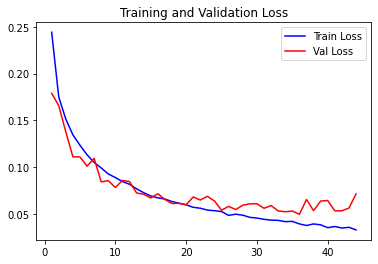

In [ ]:
# Plot the losses
loss = history.history['loss'] # Training loss
val_loss = history.history['val_loss'] # Validation loss

epochs = range(1, len(loss) + 1)

# Plotting with labels, title, and legend
plt.figure()
plt.plot(epochs, loss, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Val Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

#Third Model - Convolutional Neural Network (CNN)
My third model is a variation of my second model. This model was used for one of my final Kaggle submissions

This section contains:
*   Image data preprocessing
*   Data splitting (2 kinds)
*   Model Training
*   Loss plotting

I used 2 different kinds of data splits labelled #1 and #2 for this model. I used #1 to generate the final submission and #2 when evaluating the model performance during training iterations.

To run: 

1.   Use data split #2 and train the model
2.   Assess the performance using the performance metrics section
3.   Use data split #1 and train the model
4.   Predict on the test set in the predictions section


Data splitting #1 (for predicting on the Test Dataset):

This is the data split I used for my third model. I used different datasplits for my other models.
*   Using a 90/10 split
*   Printing out the dataset shapes after splitting to see their dimensions

In [ ]:
# Splitting the data into train and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state = 2021)

# Printing out the shapes of the datasets to ensure they are of compatible dimensions
print("Train images shape: ", X_train.shape)
print("Validation images shape: ", X_val.shape)
print("Train labels shape: ", y_train.shape)
print("Validation labels shape: ", y_val.shape)

ntrain = len(X_train)
nval = len(X_val)

Train images shape:  (64925, 20, 20, 1)
Validation images shape:  (7214, 20, 20, 1)
Train labels shape:  (64925,)
Validation labels shape:  (7214,)


Data splitting #2 (for training performance evaluation only):

This is the other data split I used for my third model, and was used solely to assess the model during training iterations. I used different datasplits for my other models.
*   Using a 90/10 split to split into train and test
*   Using a 90/10 split to split train into train and val
*   Printing out the dataset shapes after splitting to see their dimensions

In [ ]:
# Splitting the data into train and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 2021)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.10, random_state = 2021)

# Printing out the shapes of the datasets to ensure they are of compatible dimensions
print("Train images shape: ", X_train.shape)
print("Validation images shape: ", X_val.shape)
print("Test images shape: ", X_test.shape)
print("Train labels shape: ", y_train.shape)
print("Validation labels shape: ", y_val.shape)
print("Test labels shape: ", y_test.shape)

ntrain = len(X_train)
nval = len(X_val)

Train images shape:  (58432, 20, 20, 1)
Validation images shape:  (6493, 20, 20, 1)
Test images shape:  (7214, 20, 20, 1)
Train labels shape:  (58432,)
Validation labels shape:  (6493,)
Test labels shape:  (7214,)


Image data preprocessing:

This is the image data preprocessing I performed for my third CNN model. I performed different image data preprocessing for my other models.
*   Using ImageDataGenerator without image augmentation
*   Setting batch_size and train input for the model

To run: Run the cell calling the ImageDataGenerator function without image augmentation. Then create train_datagen and val_datagen (next cell).

In [ ]:
# Without image augmentation
train_image_datagen = ImageDataGenerator(rescale = 1./255)

val_image_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Setting train and val datagen with a specified batch_size
train_datagen = train_image_datagen.flow(
    x=X_train,
    y=y_train,
    batch_size=32,
)

val_datagen = val_image_datagen.flow(
    x=X_val,
    y=y_val,
    batch_size=32,
)

Model architecture: 

This is the code to build the model
*   Similar model to my second model
*   Changes in dropout layers
*   Changes in number of neurons

To run: Run all cells in this section in order and wait for the model to be trained. Must run all cells in the data splitting and image data preprocessing first before being able to train the model.

In [ ]:
# Slight variation of the second model - less dropout rate and different neurons for the Conv2D layers

model = Sequential()

model.add(Conv2D(filters=128, kernel_size=5, padding='same', activation='relu', input_shape=(20,20,1)))
model.add(MaxPooling2D(pool_size=2, padding='same', strides=2))

model.add(Conv2D(filters=96, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same', strides=2))
model.add(Dropout(rate=0.55))
model.add(layers.BatchNormalization())

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.18))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.22))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 20, 20, 128)       3328      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 96)        110688    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 96)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 5, 5, 96)          0         
                                                                 
 batch_normalization_2 (Batc  (None, 5, 5, 96)        

In [ ]:
# Compiling the model using the Adam optimizer with a learning rate of 0.0001
model.compile(loss='binary_crossentropy', 
              optimizer = Adam(lr=0.0001), 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Training the model using 60 epochs with early stopping, and the number of steps is the length of the 
# train and validation steps divided by the batch size (32)

history = model.fit_generator(
    train_datagen,
    steps_per_epoch = ntrain // 32,
    epochs = 60,
    validation_data = val_datagen,
    validation_steps = nval // 32,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, min_delta=0.0001)]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/60
2028/2028 [==============================] - 21s 10ms/step - loss: 0.2364 - acc: 0.9227 - val_loss: 0.1569 - val_acc: 0.9453
Epoch 2/60
2028/2028 [==============================] - 21s 10ms/step - loss: 0.1691 - acc: 0.9439 - val_loss: 0.1286 - val_acc: 0.9564
Epoch 3/60
2028/2028 [==============================] - 20s 10ms/step - loss: 0.1435 - acc: 0.9521 - val_loss: 0.1281 - val_acc: 0.9599
Epoch 4/60
2028/2028 [==============================] - 21s 10ms/step - loss: 0.1279 - acc: 0.9571 - val_loss: 0.1131 - val_acc: 0.9599
Epoch 5/60
2028/2028 [==============================] - 20s 10ms/step - loss: 0.1160 - acc: 0.9607 - val_loss: 0.1027 - val_acc: 0.9647
Epoch 6/60
2028/2028 [==============================] - 21s 10ms/step - loss: 0.1097 - acc: 0.9631 - val_loss: 0.0862 - val_acc: 0.9710
Epoch 7/60
2028/2028 [==============================] - 21s 10ms/step - loss: 0.1000 - acc: 0.9651 - val_loss: 0.0844 - val_acc: 0.9715
Epoch 8/60
2028/2028 [==========================

Plotting the loss curves after training (used for both data splitting #1 and #2

*   Training loss
*   Validation loss

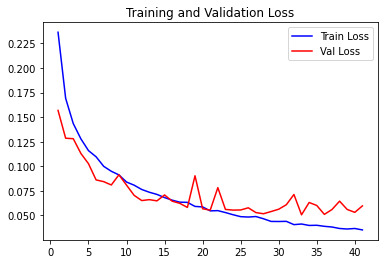

In [ ]:
# Plot the losses
loss = history.history['loss'] # Training loss
val_loss = history.history['val_loss'] # Validation loss

epochs = range(1, len(loss) + 1)

# Plotting with labels, title, and legend
plt.figure()
plt.plot(epochs, loss, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Val Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

Assessing model performance (when using data splitting #2):

*   Predicting on the test dataset that I created in the data split
*   Using performance metrics of confusion matrix and accuracy

In [ ]:
# Normalizing the test set that was set aside from the original train set
X_test_ = X_test/255

In [ ]:
# Predicting on the test set
y_pred_ = model.predict(X_test_)

# Assiging 0 or 1 labels to the predictions
y_pred = []
for value in y_pred_:
  if value > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
# Checking that y_pred is of the correct length
len(y_pred)

7214

In [ ]:
# Checking the accuracy of the predictions
print(accuracy_score(y_test, y_pred))

0.9841973939561963


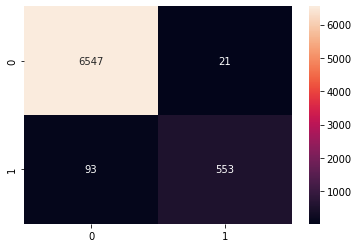

In [ ]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

#Predicting on the Test Dataset

This section is for predicting on the test set after running one of the 3 models

Data preprocessing for Test Dataset
*   Dropping the 'Id' column
*   Normalizing the values
*   Reshaping it to be of 3 dimensions

Upon prediction, add it to a csv with the respective Ids for submission

To run: Run all cells in order and download the prediction file from the files section in the Colab Notebook.

In [ ]:
# Removing the Id column, normalizing, and then reshaping the test dataset before performing predictions
X_test = test_df.drop(columns=['Id'], axis = 1).values
X_test = X_test.astype(np.float32)
X_test /= 255
X_test = X_test.reshape(-1, 20, 20, 1)

# Identify the shape of the test dataset to ensure that it has been reshaped properly
print(X_test.shape)

(30917, 20, 20, 1)


In [ ]:
# Predict on the test dataset using the trained model
values = model.predict(X_test)

In [ ]:
# Create an empty list (target) which will store all the predictions
target = []
values = values.tolist()
id = list(range(0, len(values)))

# Append all the values into the empty list (target)
for value in values:  
    target.append(value[0])

In [ ]:
# Create a csv file with 2 columns, Id and Predicted to store the Ids of the predictions and the prediction values respectively
output = pd.DataFrame(list(zip(id, target)), columns = ['Id', 'Predicted'])
output.to_csv('submission.csv', index = False)